In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import os

with open("location.json") as datafile:
  data = json.load(datafile)
dataframe = pd.DataFrame(data)

#a=pd.read_csva=pd.read_csv('./location.tsv',sep='\t')

In [38]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [39]:
a.columns

Index(['id', 'city', 'state', 'country', 'latitude', 'longitude', 'county',
       'state_fips', 'county_fips'],
      dtype='object')

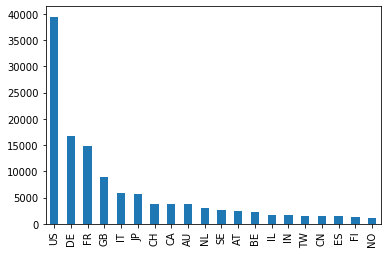

In [40]:
a['country'].value_counts()[:20].plot(kind='bar')

In [41]:
a.shape

(141990, 9)

In [42]:
a.head()

,id,city,state,country,latitude,longitude,county,state_fips,county_fips
0,000d9ler077x,Stevensburg,VA,US,38.4431,-77.9000,Culpeper,51.0,51047.0
1,0016q2zpllrt,Caorle,NaN,IT,45.5997,12.8839,NaN,NaN,NaN
2,0018ow09x2s2,Eumundi,NaN,AU,-26.4745,152.9510,NaN,NaN,NaN
3,0019b8mky5dc,Hoole,NaN,GB,53.7000,-2.8000,NaN,NaN,NaN
4,001hohwabp5m,Galax,VA,US,36.6611,-80.9242,Galax City,51.0,51640.0


In [43]:
print(a[a['country']=='US']['longitude'].mean())
print(a[a['country']=='US']['latitude'].mean())

-88.0542488300168
38.993789103815445


#### Division into Three Categories by continents

In [44]:
ASIA=a[(a['country']=='AU')|(a['country']=='CH')|(a['country']=='IN')|(a['country']=='JP')]

ASIA=ASIA[(ASIA['longitude']<154) & (ASIA['longitude']>65)& (ASIA['latitude']<41) & 
          (ASIA['latitude']>-20)]


EU=a[(a['country']=='GB') | (a['country']=='FR')|(a['country']=='DE') | (a['country']=='IT')|
    (a['country']=='NL') | (a['country']=='AT')|(a['country']=='FI') | (a['country']=='NO')|
     (a['country']=='RU')|(a['country']=='TR')]

EU=EU[(EU['longitude']<70) & (EU['longitude']>-23)& (EU['latitude']<69) & 
          (EU['latitude']>28)]



AMERICA=a[(a['country']=='US') | (a['country']=='CA')|(a['country']=='BR')]
AMERICA=AMERICA[(AMERICA['longitude']<-54) & (AMERICA['longitude']>-130)& (AMERICA['latitude']<69) & 
          (AMERICA['latitude']>-44)]

In [45]:
ASIA[(ASIA['longitude']<154)&(ASIA['longitude']>65)]['longitude'].min()

65.0821

In [46]:
ASIA['longitude'].describe()

count    6508.000000
mean      119.972875
std        26.009169
min        65.082100
25%        88.257375
50%       134.917000
75%       139.248500
max       152.833000
Name: longitude, dtype: float64

In [47]:
ASIA.head()

,id,city,state,country,latitude,longitude,county,state_fips,county_fips
47,00hqtv1mostf,Sanpada,NaN,IN,19.0606,73.0140,NaN,NaN,NaN
102,00yue4psdrkp,Hanishina-gun,NaN,JP,36.4575,138.1900,NaN,NaN,NaN
148,01j0o89xljb6,Rajouri Garden,NaN,IN,28.6415,77.1209,NaN,NaN,NaN
151,01j90wjynwfi,Senriyamahigashi,NaN,JP,34.7737,135.5080,NaN,NaN,NaN
157,01l7ed0r1p5r,Tsukama,NaN,JP,36.2167,137.9830,NaN,NaN,NaN


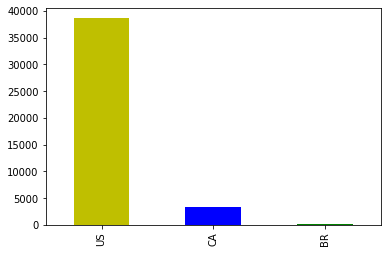

In [48]:
AMERICA['country'].value_counts().plot(kind='bar',color=['y','b','g','k'])

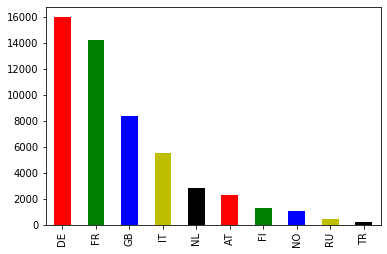

In [49]:
EU['country'].value_counts().plot(kind='bar',color=['r','g','b','y','k'])

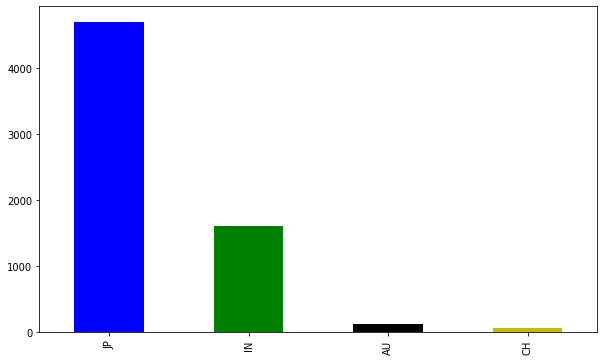

In [50]:
ASIA['country'].value_counts().plot(kind='bar',color=['b','g','k','y'],figsize=(10,6))

In [51]:
len(a['country'].value_counts())

260

In [52]:
a.isnull().sum()

id                  0
city              125
state          103239
country             0
latitude            0
longitude           0
county         103155
state_fips     103154
county_fips    103155
dtype: int64

In [53]:
# from folium import plugins
# from folium.plugins import MarkerCluster

m = folium.Map(location=[0, 0], zoom_start=3) #create map from 0,0 locs

mcg = folium.plugins.MarkerCluster(control=False)
m.add_child(mcg)

g1 = folium.plugins.FeatureGroupSubGroup(mcg, 'ASIA') 
m.add_child(g1)

g2 = folium.plugins.FeatureGroupSubGroup(mcg, 'EU') 
m.add_child(g2)

g3 = folium.plugins.FeatureGroupSubGroup(mcg, 'AMERICA')
m.add_child(g3)

#iteration through ASIAN countries owning patents
for i in range(0,len(ASIA)):
    folium.Marker([ASIA.iloc[i]['latitude'], ASIA.iloc[i]['longitude']], 
                  popup=str('country:\n')+str(ASIA.iloc[i]['country'])).add_to(g1) 
    
#iteration through EU countries owning patents

for i in range(0,len(EU)):
    folium.Marker([EU.iloc[i]['latitude'], EU.iloc[i]['longitude']], 
                  popup=str('country:\n')+str(EU.iloc[i]['country'])).add_to(g2)
    
#iteration through American countries owning patents
for i in range(0,len(AMERICA)):
    folium.Marker([AMERICA.iloc[i]['latitude'], AMERICA.iloc[i]['longitude']], 
                  popup=str('country:\n')+str(AMERICA.iloc[i]['country'])).add_to(g3)
    

folium.LayerControl(collapsed=False).add_to(m)
m.save(os.path.join('patentmap.html'))

In [54]:

#creat DF from Three continents

piedf=pd.DataFrame({'EU':[len(EU)],'ASIA':[len(ASIA)],'AMERICA':[len(AMERICA)]}).T
piedf['Continents']=piedf.index # create index
piedf=piedf.reset_index()
piedf['Number of patents']=piedf[0] #add new columns
del piedf['index']  #drop unwanted columns
del piedf[0]
piedf

,Continents,Number of patents
0,EU,52253
1,ASIA,6508
2,AMERICA,42109


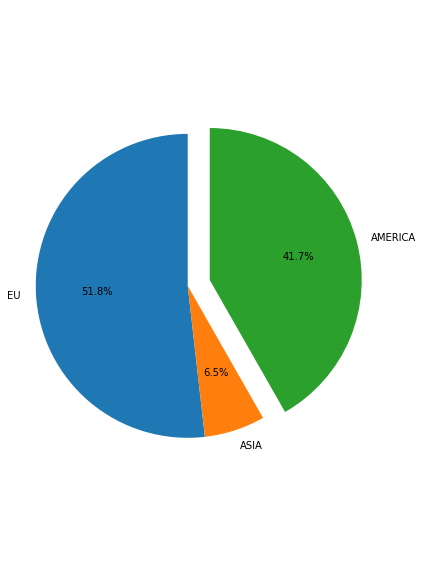

In [57]:
# Create a pie chart
fig = plt.figure(figsize=(6,8))
plt.pie(
    # using data total)arrests
    piedf['Number of patents'],
    # with the labels being officer names
    labels=piedf['Continents'],
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',

    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()
#plt.savefig("project templates/image11.png")

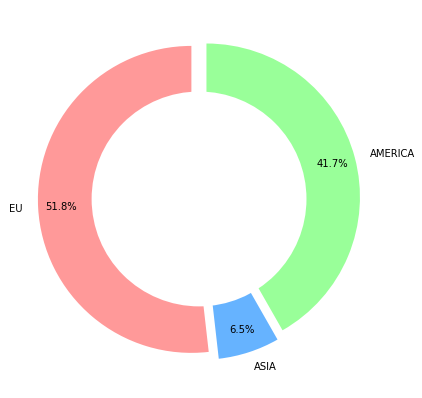

In [58]:
# Pie chart
fig = plt.figure(figsize=(6,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explosion
explode = (0.05,0.05,0.05)
 
plt.pie(
    piedf['Number of patents'],
     
    colors = colors, 
    labels=piedf['Continents'], 
    autopct='%1.1f%%', 
    startangle=90, 
    pctdistance=0.85, 
    explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
 
plt.tight_layout()
plt.show()
# plt.savefig("Images/image5.png")

In [59]:
import json

In [60]:
json_result_string = a.to_json(
    orient= 'records',
    double_precision=12,
)
json_result =json.loads(json_result_string)

In [61]:
geojson = {
    'type': 'FeatureCollection',
    'features': []
}
for record in json_result:
    geojson['features'].append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [record['longitude'], record['latitude']],
        },
        'properties': record,
    })

In [62]:
with open('location.json', 'w') as f:
    f.write(json.dumps(geojson, indent=2))